# MNIST visualization

#### load data from mnist.pkl.gz [download](http://www.iro.umontreal.ca/~lisa/deep/data/mnist/)

In [1]:
from load_data import load_data
train, valid, test  = load_data('./mnist.pkl.gz')

... loading data


D:\anaconda\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


#### check the datasets

In [3]:
print(type(train), type(valid), type(test))

<class 'tuple'> <class 'tuple'> <class 'tuple'>


#### check the dimensions of the dataset
Each column is a 28\*28 gray-scale image, flattened as 784-dimension vector.  
Training set has 50,000 samples.  
Val and Test set  have 10,000 respectively.

In [5]:
X_train = train[0]
y_train = train[1]
X_val = valid[0]
y_val = valid[1]
X_test = test[0]
y_test = test[1]
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


#### check the content of dataset
X_train contains normalized pixel values range from 0 to 1.  
y_train contains labels representing from digit 0 to digit 9

In [8]:
from numpy import unique
print(X_train.max(), X_train.min())
print(unique(y_train))

0.99609375 0.0
[0 1 2 3 4 5 6 7 8 9]


#### visualize a single picture

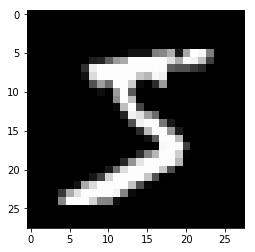

In [10]:
import matplotlib.pyplot as plt
I = X_train[0].reshape(28, 28)
plt.imshow(I*256, cmap='gray')
plt.show()

#### tile view dataset visualization

In [13]:
from PIL.Image import fromarray 
from tile_view_util import tile_raster_images

arr = tile_raster_images(X_train, image_shape=(28, 28),
            tile_shape=(12, 12), tile_spacing=(1, 1))
img = fromarray(arr)
img.show()

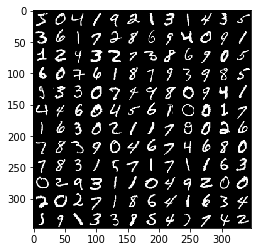

In [15]:
plt.imshow(arr, cmap='gray')
plt.show()

#### dimension-reduced dataset visualization
Since the original MNIST is too big for viusalization, I choose a mini-version offered in sklearn.datasets instead

In [1]:
import numpy as np
from sklearn import datasets
mnist = datasets.load_digits()
data  = np.array(mnist.data)
labels = np.array(mnist.target)

D:\anaconda\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
def visualize(X,y):
    x_min, x_max = X.min(0), X.max(0)
    X_norm = (X - x_min) / (x_max - x_min)  
    plt.figure(figsize=(8, 8))
    for i in range(X_norm.shape[0]):
        plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
#     plt.savefig("./images/%s.jpg"%(sys._getframe().f_back.f_code.co_name))
    plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.010s...
[t-SNE] Computed neighbors for 1797 samples in 0.713s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121136
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.227005
[t-SNE] Error after 1000 iterations: 0.775117


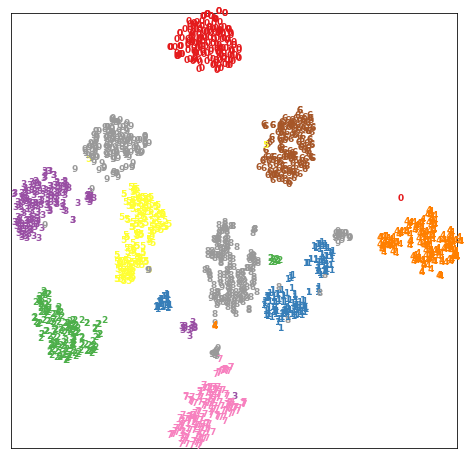

In [4]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, init='pca', random_state=501, n_iter=1000, verbose=1).fit_transform(data)
visualize(X_tsne, labels)

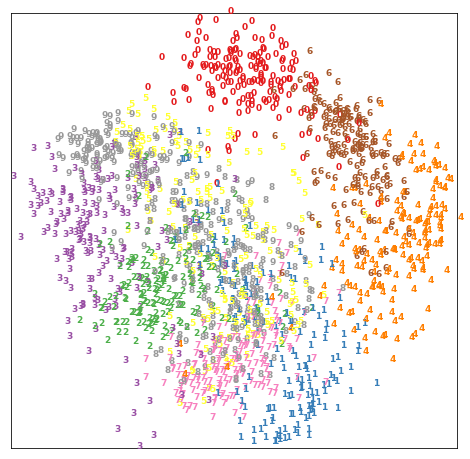

In [5]:
from sklearn import decomposition
X_PCA = decomposition.PCA(n_components=2).fit_transform(data)
visualize(X_PCA, labels)